In [28]:
# Data Manipulation

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning

from sklearn.metrics import classification_report
from pycaret.classification import *

In [ ]:
df = pd.read_csv(
    "./data/Crop_recommendation.csv"
)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [30]:
df.shape

(2200, 8)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


# EDA

In [32]:
df1 = df.copy()

Data dict : Data fields N - ratio of Nitrogen content in soil P - ratio of Phosphorous content in soil K - ratio of Potassium content in soil temperature - temperature in degree Celsius humidity - relative humidity in % ph - ph value of the soil rainfall - rainfall in mm

## Skew analysis

In [33]:
df1.drop("label", axis=1).skew(axis=0)

N              0.509721
P              1.010773
K              2.375167
temperature    0.184933
humidity      -1.091708
ph             0.283929
rainfall       0.965756
dtype: float64


- N → 0,51

Assimetria **positiva moderada**.
Leve cauda à direita.

- P → 1,01

Assimetria **positiva forte**.
Tem valores altos puxando a distribuição.
- K → 2,37

Assimetria **positiva muito forte**.
Aqui é bem concentrado em valores baixos com poucos valores muito altos.
Provavelmente precisa transformação (log, por exemplo).

- temperature → 0,18

Quase **simétrica**.
Distribuição bem comportada.


- humidity → -1,09

Assimetria **negativa forte**.
Cauda longa à esquerda.
Tem valores baixos puxando a distribuição.
- ph → 0,28

Leve assimetria positiva.
Praticamente simétrica.
- rainfall → 0,97

Assimetria positiva moderada/forte.
Muitos valores baixos e alguns muito altos.



## Nitrogen Distribution

In [34]:
df1["N"]

0        90
1        85
2        60
3        74
4        78
       ... 
2195    107
2196     99
2197    118
2198    117
2199    104
Name: N, Length: 2200, dtype: int64

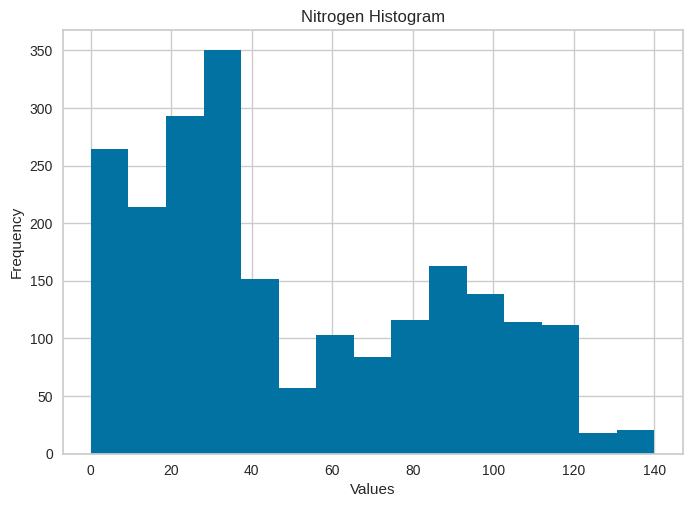

count    2200.000000
mean       50.551818
std        36.917334
min         0.000000
25%        21.000000
50%        37.000000
75%        84.250000
max       140.000000
Name: N, dtype: float64


In [35]:
import matplotlib.pyplot as plt

# Criando o histograma
plt.hist(df1["N"], bins="auto")

# Títulos e rótulos
plt.title("Nitrogen Histogram")
plt.xlabel("Values")
plt.ylabel("Frequency")

plt.show()

print(df1["N"].describe())

In [36]:
df1["N"].quantile(0.6)

54.0

- Distribuição assimétrica
- Desvião padrão alto
- Apesar da cauda se estender a direita, é possível observar uma tendencia de valores abaixo de 60 aparecerem mais. Isso pode ser confirmado observando o percentil 60
  

In [37]:
def analysis(variable, name: str):
    plt.hist(variable, bins="auto")

    # Títulos e rótulos
    plt.title(f"{name} Histogram")
    plt.xlabel("Values")
    plt.ylabel("Frequency")

    plt.show()

    print(variable.describe())

## Phosphorous

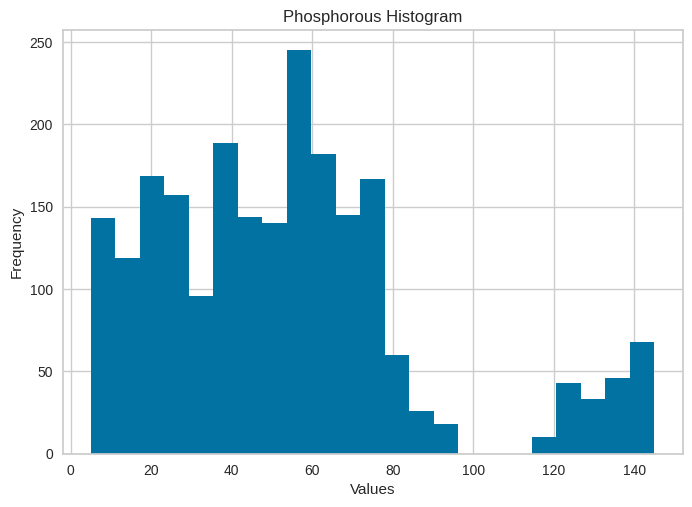

count    2200.000000
mean       53.362727
std        32.985883
min         5.000000
25%        28.000000
50%        51.000000
75%        68.000000
max       145.000000
Name: P, dtype: float64


In [38]:
analysis(df1["P"], name="Phosphorous")

- Distribuição assimetrica
- Alta concentração de valores até 80

## Potassium

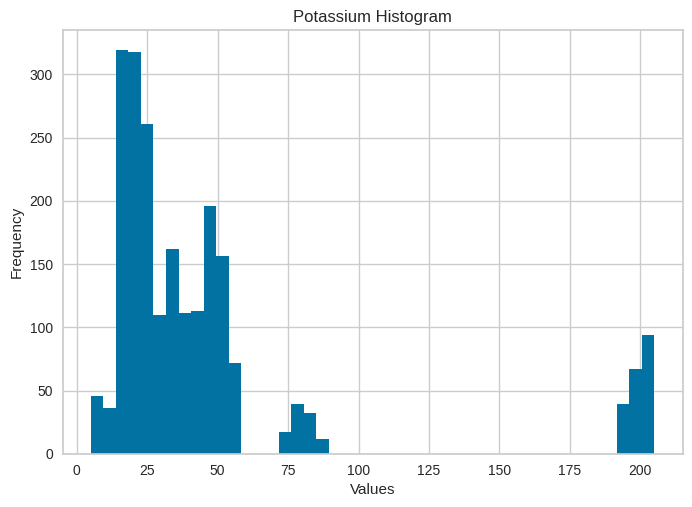

count    2200.000000
mean       48.149091
std        50.647931
min         5.000000
25%        20.000000
50%        32.000000
75%        49.000000
max       205.000000
Name: K, dtype: float64


In [39]:
analysis(df1["K"], name="Potassium")

In [40]:
df1["K"].quantile(0.8)

52.0

- Assimetria forte!
- Possível outliers em torno dos valores 200. Análise mais profunda será necessaria
- Concentração de valores alta até o percentil 80 (até 54)

## Label

In [41]:
df1["label"].describe()

count     2200
unique      22
top       rice
freq       100
Name: label, dtype: object

In [42]:
df1["label"].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

- Distribuição uniforme. Nada a declarar por enquanto

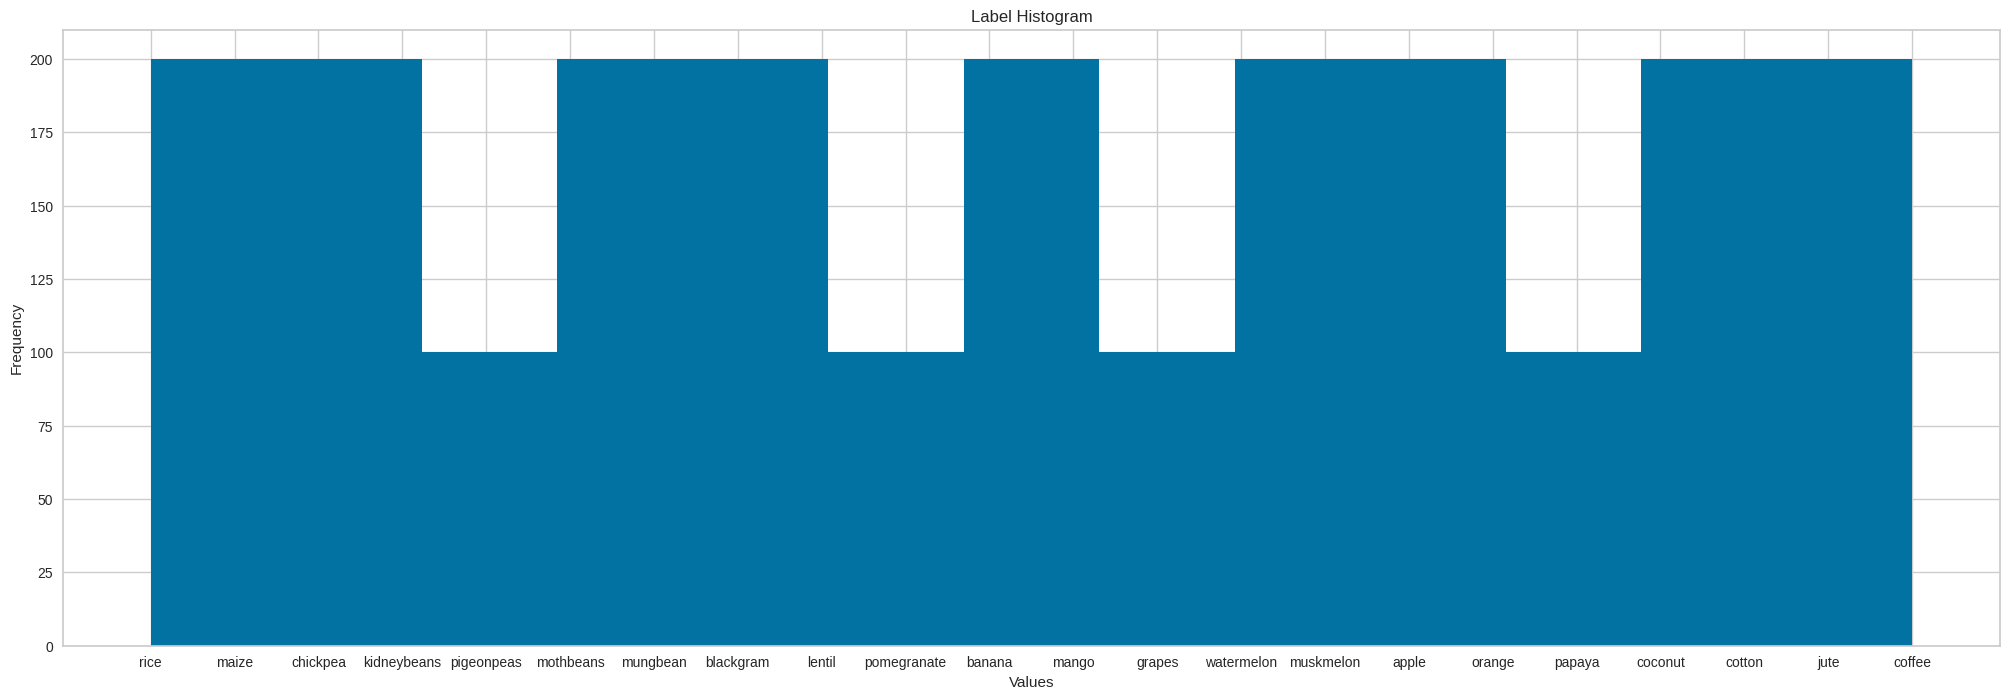

count     2200
unique      22
top       rice
freq       100
Name: label, dtype: object


In [43]:
plt.figure(figsize=(25, 8))


analysis(df1["label"], name="Label")

## Analyzing the "nature" variables

In [44]:
def analysis(data, variable, name: str, log_transformation=False):

    # Gráfico original
    if log_transformation:
        plt.hist(variable, bins="auto")
        plt.title(f"{name} Histogram (Original)")
        plt.xlabel("Values")
        plt.ylabel("Frequency")
        plt.show()

        print(f"Skewness before log: {variable.skew()}")
        print("Original Data:")
        print(variable.describe())

        # Aplicando log
        variable = np.log(variable + 1)
        data[f"{variable.name}_log"] = variable
        data.drop(variable.name, axis=1, inplace=True)

    # Gráfico final (com ou sem log)
    plt.hist(variable, bins="auto")

    if log_transformation:
        plt.title(f"{name} Histogram (Log Transformed)")
    else:
        plt.title(f"{name} Histogram")

    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.show()

    print(f"Skewness: {variable.skew()}")
    print("Final Data:")
    print(variable.describe())
    print

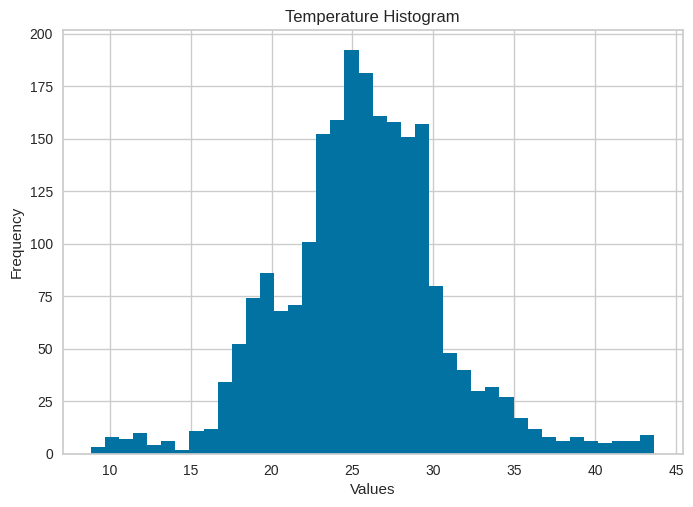

Skewness: 0.18493273421137887
Final Data:
count    2200.000000
mean       25.616244
std         5.063749
min         8.825675
25%        22.769375
50%        25.598693
75%        28.561654
max        43.675493
Name: temperature, dtype: float64


In [45]:
analysis(df1, df1["temperature"], name="Temperature")

- Distribuição próxima da normal
- Por ser proxima do normal os valores tendem a ficar próximo de média. Isso tbm pode ser explicado pois a temperatura geralmente fica em torno da média, apenas mudando por fatores externos como frente fria e até eventos extremos como ciclones e furacões.


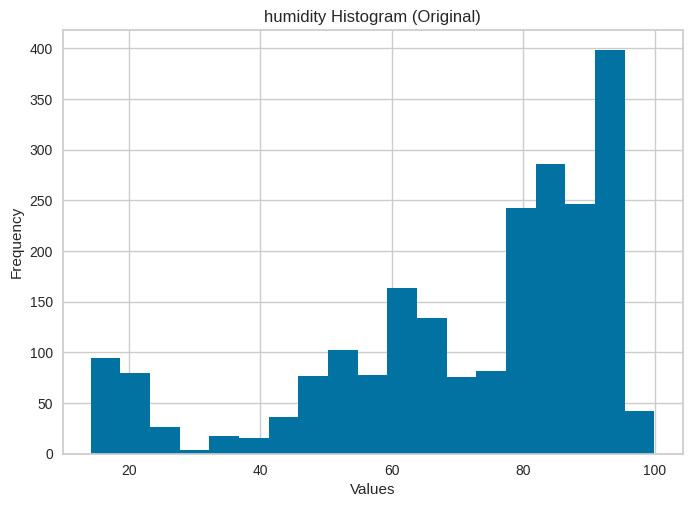

Skewness before log: -1.0917079195808679
Original Data:
count    2200.000000
mean       71.481779
std        22.263812
min        14.258040
25%        60.261953
50%        80.473146
75%        89.948771
max        99.981876
Name: humidity, dtype: float64


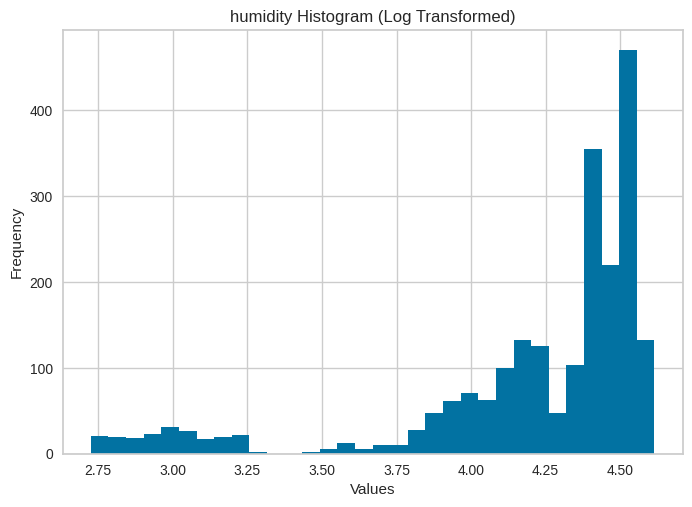

Skewness: -1.880141804015145
Final Data:
count    2200.000000
mean        4.208081
std         0.442656
min         2.725107
25%         4.115159
50%         4.400273
75%         4.510296
max         4.614941
Name: humidity, dtype: float64


In [46]:
analysis(df1, df1["humidity"], name="humidity", log_transformation=True)

- Distribuição com assimetria alta para esquerda mesmo logaritmando
- Pela cauda ser forte para a esquerda, logaritmar a variável não ajudou a melhorar a assimetria e apenas piorou a assimetria

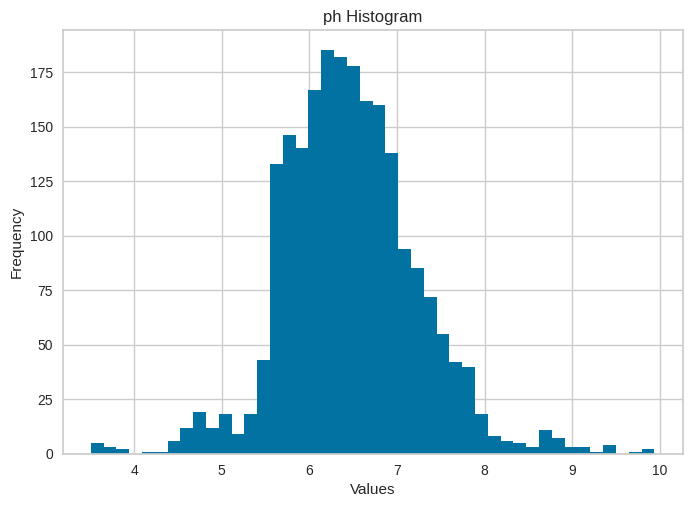

Skewness: 0.2839294375729441
Final Data:
count    2200.000000
mean        6.469480
std         0.773938
min         3.504752
25%         5.971693
50%         6.425045
75%         6.923643
max         9.935091
Name: ph, dtype: float64


In [47]:
analysis(df1, df1["ph"], name="ph", log_transformation=False)

- Distribuição próxima da normal, o que mostra que os dados giram mais em torno da média 6.46

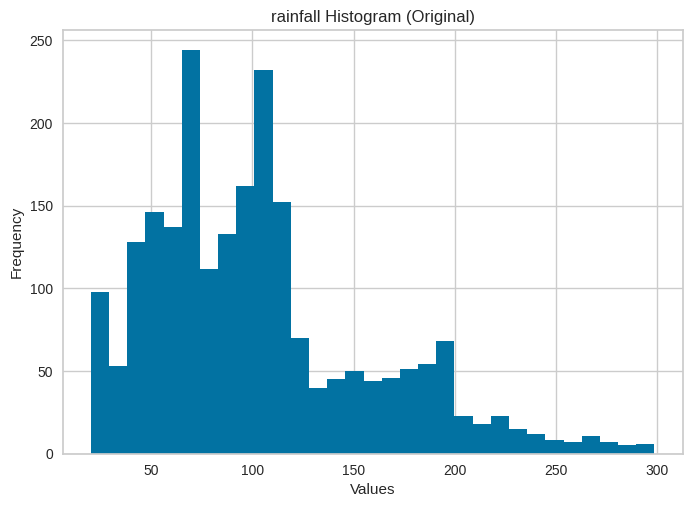

Skewness before log: 0.9657563536272812
Original Data:
count    2200.000000
mean      103.463655
std        54.958389
min        20.211267
25%        64.551686
50%        94.867624
75%       124.267508
max       298.560117
Name: rainfall, dtype: float64


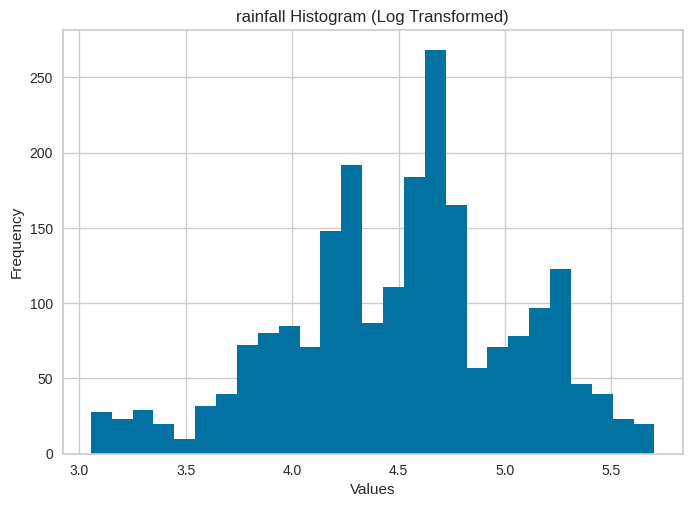

Skewness: -0.30018624278441275
Final Data:
count    2200.000000
mean        4.508730
std         0.545400
min         3.054533
25%         4.182839
50%         4.562968
75%         4.830451
max         5.702315
Name: rainfall, dtype: float64


In [48]:
analysis(df1, df1["rainfall"], name="rainfall", log_transformation=True)

- Distribuição se aproximou da normal após transformação logaritmica, mostrando que os dados logaritmicos tendem a ficar proximos da media, apesar de ter uma cauda levemente pra esquerda

In [49]:
df1

,N,P,K,temperature,ph,label,humidity_log,rainfall_log
0,90,42,43,20.879744,6.502985,rice,4.418874,5.317804
1,85,58,41,21.770462,7.038096,rice,4.398388,5.427834
2,60,55,44,23.004459,7.840207,rice,4.422698,5.579595
3,74,35,40,26.491096,6.980401,rice,4.396402,5.496611
4,78,42,42,20.130175,7.628473,rice,4.414069,5.574878
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,6.780064,coffee,4.210842,5.186125
2196,99,15,27,27.417112,6.086922,coffee,4.054154,4.859228
2197,118,33,30,24.131797,6.362608,coffee,4.222813,5.160909
2198,117,32,34,26.272418,6.758793,coffee,3.972693,4.853399


## Correlation analysis

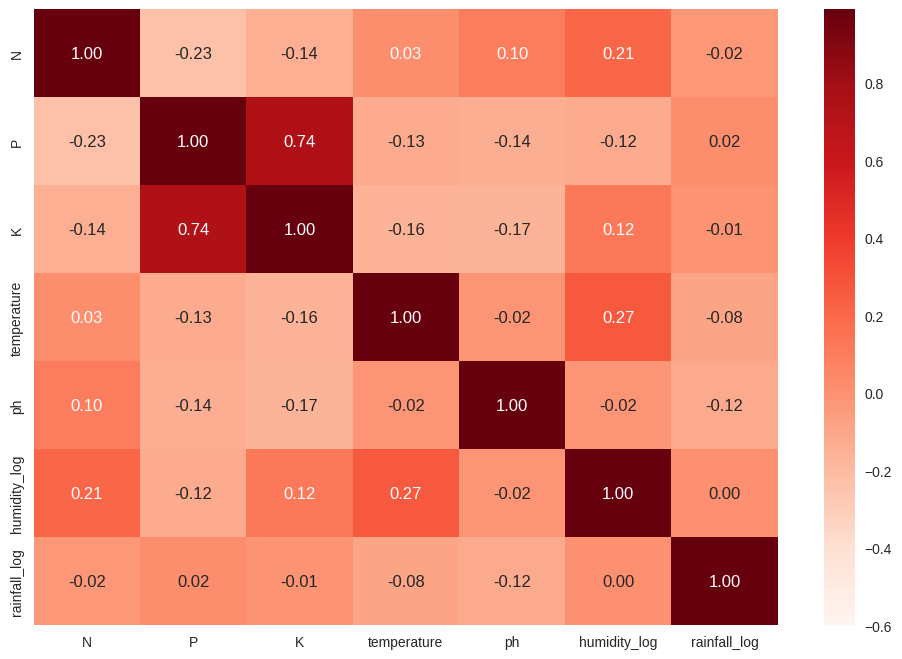

In [50]:
# Tamanho da figura
plt.figure(figsize=(12, 8))

# Mapa de calor
# Estamos realçando os valores de correlação entre 0.59 e 0.99, positivo ou negativo.
sns.heatmap(
    df1.drop("label", axis=1).corr(),
    annot=True,
    fmt=".2f",
    cmap="Reds",
    vmax=0.99,
    vmin=-0.60,
)
plt.show()

- Nitrogenio não possui uma correlação forte com a maioria das variaveis, mesmo considerando que faz parte do trio de macronutrientes para plantas
- P e K possuem uma correlação fortissima. Isso se deve a sua natureza biológica para as plantas, já que "um depende do outro"
- Temperatura possui uma correlação baixa com a maioria das variaveis, mas apresenta correlação fraca-media com umidade
- Umidade possui correlação fraca com a maioria, porém apresenta uma correlação fraca-media para temperatura, N e K
- ph não possui correlações fortes. Comportamento inesperado devido a sua natureza e como importa para P e K
- rainfall não possui correlação

Apesar da correlação fortissima entre P + K, não pretendo remover uma ou criar uma nova variável primeiramente, já que essa correlação é natural pro contexto que estamos trabalhando, fora que poderia diminuir interpretabilidade do modelo!

In [51]:
# Detecting multicolineatiry with VIF


def verifica_vif(train):

    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # Cria o dataframe
    vif = pd.DataFrame()

    # Alimenta cada coluna
    vif["feature"] = train.columns

    # Calcula VIF para cada variável
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]

    return vif

Pelas variaveis possuirem escalas diferentes, precisamos padronizar para conseguirmos interpretar melhor o ViF

In [52]:
scaler = StandardScaler()

df1_scaled = df1.drop("label", axis=1)

df1_scaled = scaler.fit_transform(df1_scaled)

df1_scaled = pd.DataFrame(df1_scaled, columns=scaler.get_feature_names_out())

In [53]:
df1_scaled

,N,P,K,temperature,ph,humidity_log,rainfall_log
0,1.068797,-0.344551,-0.101688,-0.935587,0.043302,0.476309,1.483789
1,0.933329,0.140616,-0.141185,-0.759646,0.734873,0.430018,1.685576
2,0.255986,0.049647,-0.081939,-0.515898,1.771510,0.484950,1.963897
3,0.635298,-0.556811,-0.160933,0.172807,0.660308,0.425532,1.811709
4,0.743673,-0.344551,-0.121436,-1.083647,1.497868,0.465451,1.955246
...,...,...,...,...,...,...,...
2195,1.529390,-0.587134,-0.318922,0.228814,0.401395,0.006239,1.242299
2196,1.312641,-1.163269,-0.417666,0.355720,-0.494413,-0.347815,0.642791
2197,1.827421,-0.617457,-0.358420,-0.293218,-0.138120,0.033289,1.196054
2198,1.800327,-0.647780,-0.279425,0.129612,0.373904,-0.531885,0.632101


In [54]:
verifica_vif(df1_scaled)

,feature,VIF
0,N,1.104347
1,P,2.494384
2,K,2.570377
3,temperature,1.151451
4,ph,1.054587
5,humidity_log,1.297358
6,rainfall_log,1.029208


- Através do VIF conseguimos saber que não há multicolinearidade entre as nossas variáveis independentes, o que é um bom sinal se caso usarmos algoritmos parametricos

## Outliers detection

In [55]:
def detectar_outliers_iqr(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]

    return outliers, limite_inferior, limite_superior


columns = ["N", "P", "K", "temperature", "humidity_log", "ph", "rainfall_log"]

for variables in columns:
    outliers, li, ls = detectar_outliers_iqr(df1, variables)

    print(f"Variable: {variables}")
    print("Limite inferior:", li)
    print("Limite superior:", ls)
    print("Quantidade de outliers:", len(outliers))
    print("\n")

Variable: N
Limite inferior: -73.875
Limite superior: 179.125
Quantidade de outliers: 0


Variable: P
Limite inferior: -32.0
Limite superior: 128.0
Quantidade de outliers: 138


Variable: K
Limite inferior: -23.5
Limite superior: 92.5
Quantidade de outliers: 200


Variable: temperature
Limite inferior: 14.080955682499999
Limite superior: 37.2500728825
Quantidade de outliers: 86


Variable: humidity_log
Limite inferior: 3.522452855794077
Limite superior: 5.103002469216014
Quantidade de outliers: 206


Variable: ph
Limite inferior: 4.543768066249998
Limite superior: 8.351567354250005
Quantidade de outliers: 57


Variable: rainfall_log
Limite inferior: 3.211420257625638
Limite superior: 5.801870005081257
Quantidade de outliers: 42




Por enquanto não vou remover os outliers. 

# Modeling

Using pycaret to test different models

In [ ]:
# Since our target variable is categorical and not ordinal, I'm going to use labelencoder()


encoder = LabelEncoder()

y = encoder.fit_transform(df1["label"])
df1_scaled["label"] = y


from sklearn.model_selection import train_test_split

# X = características (features), y = alvo (target)
train, test = train_test_split(df1_scaled, test_size=0.2, random_state=42)

In [57]:
# Now we have our dataset ready for modeling. We can use PyCaret to quickly compare different classification models and find the best one for our data.

s = setup(df1_scaled, target="label", session_id=123)

,Description,Value
0,Session id,123
1,Target,label
2,Target type,Multiclass
3,Original data shape,"(2200, 8)"
4,Transformed data shape,"(2200, 8)"
5,Transformed train set shape,"(1540, 8)"
6,Transformed test set shape,"(660, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [58]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.9948,0.9999,0.9948,0.9953,0.9948,0.9946,0.9946,0.0170
rf,Random Forest Classifier,0.9929,1.0000,0.9929,0.9937,0.9928,0.9925,0.9926,0.0740
et,Extra Trees Classifier,0.9929,1.0000,0.9929,0.9937,0.9928,0.9925,0.9926,0.0550
qda,Quadratic Discriminant Analysis,0.9922,0.0000,0.9922,0.9933,0.9921,0.9918,0.9919,0.0130
lightgbm,Light Gradient Boosting Machine,0.9903,0.9999,0.9903,0.9915,0.9903,0.9898,0.9899,2.8870
gbc,Gradient Boosting Classifier,0.9883,0.0000,0.9883,0.9897,0.9883,0.9878,0.9878,1.2290
dt,Decision Tree Classifier,0.9857,0.9925,0.9857,0.9872,0.9855,0.9850,0.9851,0.0140
lda,Linear Discriminant Analysis,0.9753,0.0000,0.9753,0.9791,0.9749,0.9741,0.9744,0.0150
lr,Logistic Regression,0.9688,0.0000,0.9688,0.9730,0.9683,0.9673,0.9676,0.4120
knn,K Neighbors Classifier,0.9662,0.9970,0.9662,0.9726,0.9657,0.9646,0.9650,0.1900


In [59]:
predictions = predict_model(best, data=test)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.9932,1.0000,0.9932,0.9936,0.9931,0.9928,0.9929


,N,P,K,temperature,ph,humidity_log,rainfall_log,label,prediction_label,prediction_score
1451,1.366828,-1.102623,-0.022693,0.765965,-0.367590,0.798656,-2.203549,15,15,1.0
1334,1.285547,-1.375529,0.056302,0.111228,-0.271588,0.596120,-1.078598,21,21,1.0
1761,0.228893,0.261907,0.016804,3.504974,0.610029,0.765895,0.445546,17,17,1.0
1735,-0.177513,0.201261,0.135296,1.711417,0.459949,0.697915,0.168419,17,17,1.0
1576,-0.556825,2.536124,2.998848,-0.533707,-1.119294,0.701593,0.505177,0,0,1.0


In [60]:
tuned_dt = tune_model(best, optimize="F1", n_iter=50, search_algorithm="random")

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:00:23
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9870,0.9999,0.9870,0.9870,0.9870,0.9864,0.9864
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9870,0.9999,0.9870,0.9870,0.9870,0.9864,0.9864
4,0.9870,0.9998,0.9870,0.9899,0.9867,0.9864,0.9866
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9870,0.9997,0.9870,0.9886,0.9869,0.9864,0.9865


Fitting 10 folds for each of 28 candidates, totalling 280 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Por ser dados augmentados de outros dados, esses dados são perfeitinhos e possuem uma acurácia alta. O propósito do projeto é simular um projeto end-to-end, então a complexidade dos dados não é foco,

In [61]:
tuned_dt

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Training model

best

In [63]:
best

GaussianNB(priors=None, var_smoothing=1e-09)

In [64]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

In [65]:
model.fit(train.drop("label", axis=1), train["label"])

GaussianNB(priors=None, var_smoothing=1e-09)

In [67]:
pred = model.predict(test.drop("label", axis=1))
print(classification_report(test["label"], pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        23
           1     1.0000    1.0000    1.0000        21
           2     1.0000    1.0000    1.0000        20
           3     1.0000    1.0000    1.0000        26
           4     1.0000    1.0000    1.0000        27
           5     1.0000    1.0000    1.0000        17
           6     1.0000    1.0000    1.0000        17
           7     1.0000    1.0000    1.0000        14
           8     0.9200    1.0000    0.9583        23
           9     1.0000    1.0000    1.0000        20
          10     1.0000    1.0000    1.0000        11
          11     1.0000    1.0000    1.0000        21
          12     1.0000    1.0000    1.0000        19
          13     0.9600    1.0000    0.9796        24
          14     1.0000    1.0000    1.0000        19
          15     1.0000    1.0000    1.0000        17
          16     1.0000    1.0000    1.0000        14
          17     1.0000    

Não vou fazer tuning de parametros pois o modelo já está com uma acurácia quase no máximo e o GaussianNB só possui 2 parametros

In [75]:
import joblib

preprocessor = {"scaler": scaler, "labelencoder": encoder}

joblib.dump(model, "../model/gaussiannb.joblib")
joblib.dump(preprocessor, "../model/preprocessor.joblib")

['../model/preprocessor.joblib']